# Exercises

## Input - Output

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### 1. Create an igraph network from an adjacency matrix and an edgelist.

The Drosophila's Connectome [Shih, Sporns et al. 2015](https://doi.org/10.1016/j.cub.2015.03.021)

In the supplementary material you can find a [spreadsheet](https://ars.els-cdn.com/content/image/1-s2.0-S096098221500336X-mmc2.xlsx) with the connectivity matrix (sheet 2), i.e.the weighted adjacency matrix of the Drosophila's connectome.

0. The xlsx file has already been saved in the data folder.
1. Read the second sheet of the xlsx file.
2. From the matrix (or data.frame) build a weighted directed network using `igraph`.
3. Plot the network with and without node names, try customising it.

All you need can be found in `igraph`'s [documentaion](http://igraph.org/r/doc/).

Let's start with data import: since the excel has several sheets we cannot use the function `read.csv()`. There are different packages for manipulation of xlsx files, here I use `readxl` since we just need to _read_ a file and it is included in `tidyverse`. Still, we have to load it explicitly because it is not a tidyverse core package.

In [2]:
library(readxl)

In [3]:
adj <- data.frame(read_excel("data/dros.xlsx", sheet = 2))
head(adj[, 1:6])

New names:
* `` -> `..1`


..1,AL,AMMC,CCP,CMP,CVLP
AL,0.00000,23.31957,63.42209,1.000000,115.97143
AMMC,35.02518,0.00000,96.47922,149.282718,964.54705
CCP,15.15587,98.71595,0.00000,99.046269,334.17676
CMP,10.41421,73.93845,64.91628,0.000000,253.52284
CVLP,50.83450,268.67187,350.10114,314.757086,0.00000
DLP,41.92665,22.02185,132.28065,5.414214,28.26119


In [4]:
rownames(adj) <- adj$X__1
adj <- adj[, -1]
head(adj[, 1:6])

AL,AMMC,CCP,CMP,CVLP,DLP
0.00000,23.31957,63.42209,1.000000,115.97143,97.92639
35.02518,0.00000,96.47922,149.282718,964.54705,65.53807
15.15587,98.71595,0.00000,99.046269,334.17676,56.40859
10.41421,73.93845,64.91628,0.000000,253.52284,39.41425
50.83450,268.67187,350.10114,314.757086,0.00000,150.59538
41.92665,22.02185,132.28065,5.414214,28.26119,0.00000


In [5]:
gdros <- graph_from_adjacency_matrix(adjmatrix = as.matrix(adj), weighted = T)

In [6]:
gdros

IGRAPH 4d786a0 DNW- 49 1950 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 4d786a0 (vertex names):
 [1] AL  ->AMMC  AL  ->CCP   AL  ->CMP   AL  ->CVLP  AL  ->DLP   AL  ->DMP  
 [7] AL  ->EB    AL  ->FB    AL  ->IDFP  AL  ->LH    AL  ->MB    AL  ->NOD  
[13] AL  ->OPTU  AL  ->PAN   AL  ->PCB   AL  ->SDFP  AL  ->SOG   AL  ->SPP  
[19] AL  ->VLP.D AL  ->VLP.V AL  ->VMP   AL  ->al    AL  ->ccp   AL  ->cvlp 
[25] AL  ->dlp   AL  ->dmp   AL  ->idfp  AL  ->lh    AL  ->mb    AL  ->nod  
[31] AL  ->optu  AL  ->pan   AL  ->sdfp  AL  ->sog   AL  ->spp   AL  ->vlp.d
[37] AL  ->vmp   AMMC->AL    AMMC->CCP   AMMC->CMP   AMMC->CVLP  AMMC->DLP  
[43] AMMC->DMP   AMMC->EB    AMMC->FB    AMMC->IDFP  AMMC->LH    AMMC->LOB  
+ ... omitted several edges

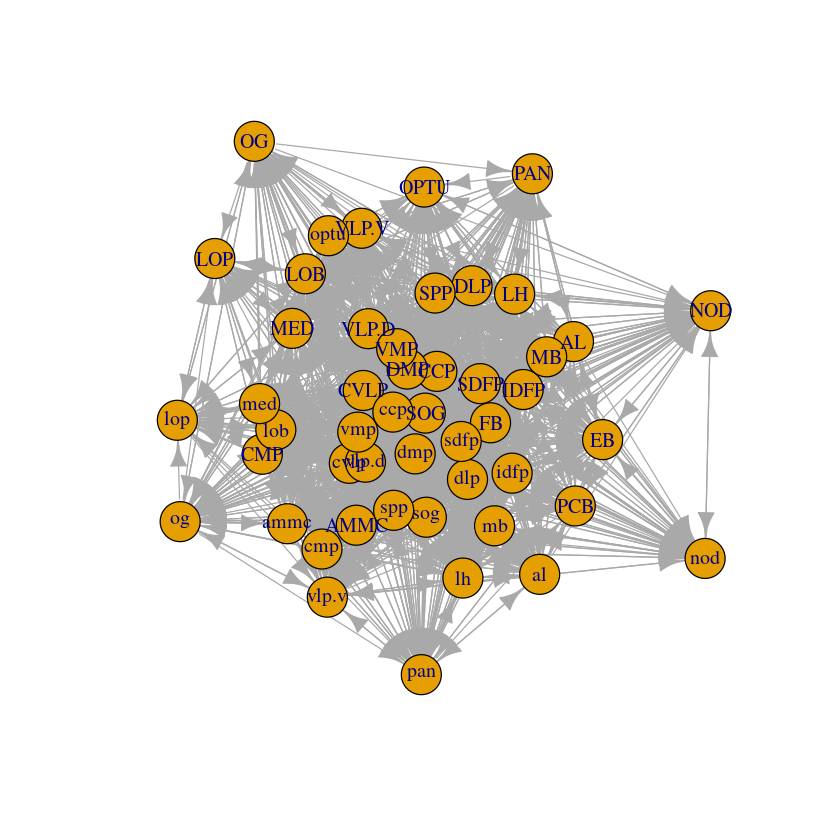

In [7]:
plot(gdros)

**To-Do: Make the plot nicer!** Look at [`igraph.plotting`](https://igraph.org/r/doc/plot.common.html).

#### 1.2 Save the network as an edge list, then read it and re-build the network.

**Hint:** use `write_graph(graph, file, format = "edgelist", ...)` and `read_graph(file, format = "edgelist")`.

**Problem:** how to write edge weights? Find a workaround!

Other useful functions:
* `as_edgelist(graph, names = TRUE)`
* `graph_from_edgelist(el, directed = TRUE)`
* see [igraph/r/doc](https://igraph.org/r/doc/)

### 2. Open Source Network Data

There are different sources of curated network datasets, a couple of examples are:
* [The Networkrepository](http://networkrepository.com/)
* [The UCI Network Data Repository](https://networkdata.ics.uci.edu/).

Further some research groups release data after publishing their work, so you can often find the data in the supplementaries or on lab's webpages, e.g. [CoMuNe data](https://comunelab.fbk.eu/data.php).

Try importing some datasets.

## Network Properties

### 1. - (continues)

Take the connectome of the Drosophila and find out:
* Number of vertices,
* number of edges and edge density of the network;
* compute the degree distribution (and plot it).
* Compute a **centralitiy** and plot again the network, this time **vertex size** depends on the centrality.

### 2. Network Models

Generate synthetic networks from different models (Random graphs, Small World, Scale-free networks...) and compare their degree distributions, diameters, average shortest-path length and community structure.